This notebook creates a raincould plot for baseline features and change in features compared with change in age. 

In [45]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import os 
import sys
sys.path.append('../scripts')
import io_meld as io


In [70]:
import pandas as pd


# Load the aggregated CSV data
T1_csv_file_path = 'pathto/age_z_with_contralateral.csv'
data_df = pd.read_csv(T1_csv_file_path)

# Load the aggregated CSV data
FLAIR_csv_file_path = 'pathto/FLAIR_age_z_with_contralateral.csv'
data_df = pd.read_csv(FLAIR_csv_file_path)


In [77]:
# Define the new CSV file path
combined_csv_file_path = 'pathto/combined_data.csv'

# Define the column names
columns = ["Simplified_Subject", "Feature", "Age1", "Age2", "Lesion1", "Lesion2", "LesionContra1", "LesionContra2", "Contra1", "Contra2"]

# Load the CSV files
flair_df = pd.read_csv(FLAIR_csv_file_path, names=columns, header=None)
t1_df = pd.read_csv(T1_csv_file_path, names=columns, header=None)

# Combine the data sets
combined_df = pd.concat([flair_df, t1_df])

# Save the combined data set to a new CSV file
combined_df.to_csv(combined_csv_file_path, index=False)

print(combined_csv_file_path)



/Users/pierceburr/Documents/Documents/UCL_dissertation/meld/output/fastsurfer/inter.intra_z/combined_data.csv


In [31]:
pip install ptitprince seaborn matplotlib


1041.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd

# Define the file path
csv_file_path = 'pathto/combined_data.csv'

# Load the CSV file
data_df = pd.read_csv(csv_file_path)

# Convert necessary columns to numeric, forcing any errors to NaN
data_df[['Age1', 'Age2', 'Lesion1', 'Lesion2', 'LesionContra1', 'LesionContra2']] = \
    data_df[['Age1', 'Age2', 'Lesion1', 'Lesion2', 'LesionContra1', 'LesionContra2']].apply(pd.to_numeric, errors='coerce')

# Provided feature names
feature_names = ['gm_T1_0.5', 'wm_T1_0.5', 'thickness', 'w-g.pct', 'pial.k_filtered.sm20', 'sulc', 'gm_FLAIR_0.5', 'wm_FLAIR_0.5']

# Function to calculate time-adjusted values
def time_adjusted(T1, T2, age1, age2):
    return (T2 - T1) / (age2 - age1)

# Adjust values for each feature
adjusted_data = []
for feature in feature_names:
    feature_df = data_df[data_df['Feature'] == feature]
    
    # Calculate time-adjusted values
    lesion_adjusted = time_adjusted(feature_df['Lesion1'], feature_df['Lesion2'], feature_df['Age1'], feature_df['Age2'])
    contralateral_adjusted = time_adjusted(feature_df['LesionContra1'], feature_df['LesionContra2'], feature_df['Age1'], feature_df['Age2'])
    
    # Store adjusted values in a DataFrame
    adjusted_feature_df = pd.DataFrame({
        'Feature': feature,
        'Lesion_Adjusted': lesion_adjusted,
        'Contralateral_Adjusted': contralateral_adjusted
    })
    
    adjusted_data.append(adjusted_feature_df)

# Concatenate all adjusted data into a single DataFrame
adjusted_df = pd.concat(adjusted_data)

# Reshape the data into the required format
reshaped_data = pd.melt(adjusted_df, id_vars=['Feature'], 
                        value_vars=['Lesion_Adjusted', 'Contralateral_Adjusted'], 
                        var_name='Lesion_contra', value_name='Z-score')

# Save the reshaped DataFrame to a CSV file
reshaped_data.to_csv('path/reshaped_data.csv', index=False)

print(csv_file_path)


/Users/pierceburr/Documents/Documents/UCL_dissertation/meld/output/fastsurfer/inter.intra_z/combined_data.csv


In [73]:
import pandas as pd

# Define the file path
csv_file_path = 'path/combined_data.csv'

# Load the CSV file
data_df = pd.read_csv(csv_file_path, header=None)

# Provided feature names

# Assign column names based on the data format
columns = ['Simplified_Subject', 'Feature', 'Age1', 'Age2', 'Lesion1', 'Lesion2', 'LesionContra1', 'LesionContra2', 'Contra1', 'Contra2']
data_df.columns = columns

# Initialize lists to collect data
lesion_data = []
lesion_contra_data = []

# Extract lesion and contralateral lesion values for each feature
for feature in feature_names:
    # Print feature being processed
    print(f'Processing feature: {feature}')
    feature_data = data_df[data_df['Feature'].str.contains(feature, case=False, na=False)]
    
    # Check if feature_data is empty
    if feature_data.empty:
        print(f'No data found for feature: {feature}')
    else:
        for _, row in feature_data.iterrows():
            lesion_data.append({'Feature': feature, 'Lesion_contra': 'Lesion', 'Z-score': row['Lesion1']})
            lesion_data.append({'Feature': feature, 'Lesion_contra': 'Lesion', 'Z-score': row['Lesion2']})
            lesion_contra_data.append({'Feature': feature, 'Lesion_contra': 'LesionContra', 'Z-score': row['LesionContra1']})
            lesion_contra_data.append({'Feature': feature, 'Lesion_contra': 'LesionContra', 'Z-score': row['LesionContra2']})

# Combine the data into a single DataFrame
combined_data = pd.DataFrame(lesion_data + lesion_contra_data)

# Save the reshaped DataFrame to a CSV file, overwriting if it already exists
output_file_path = 'path/baseline_data.csv'
combined_data.to_csv(output_file_path, index=False)

print(f'Saved combined data to {output_file_path}')



Processing feature: gm_T1_0.5
Processing feature: wm_T1_0.5
Processing feature: thickness
Processing feature: w-g.pct
Processing feature: pial.k_filtered.sm20
Processing feature: sulc
Processing feature: gm_FLAIR_0.5
Processing feature: wm_FLAIR_0.5
Saved combined data to /Users/pierceburr/Documents/Documents/UCL_dissertation/meld/output/fastsurfer/inter.intra_z/baseline_data.csv


In [74]:
import pandas as pd

# Define the file path
csv_file_path = 'path/reshaped_data.csv'

# Load the CSV file
reshaped_data = pd.read_csv(csv_file_path)

# Provided alternative names
alternative_names = {
    'gm_T1_0.5': 'T1 midthickness grey matter intensity',
    'gm_T1_0.75': 'T1 .75 grey matter intensity',
    'gm_T1_0.25': 'T1 .25 grey matter intensity',
    'gm_T1_0': 'T1 0 grey matter intensity',
    'wm_T1_1': 'T1 1mm white matter intensity',
    'wm_T1_0.5': 'T1 0.5mm white matter intensity',
    'thickness': 'cortical thickness',
    'w-g.pct': 'white-grey matter contrast',
    'pial.k_filtered.sm20': 'cortical curvature',
    'sulc': 'sulcal depth',
    'gm_FLAIR_0.5': 'FLAIR midthickness grey matter intensity',
    'wm_FLAIR_0.5': 'FLAIR 0.5mm white matter intensity'
}

# Rename the 'Feature' column according to the alternative names
reshaped_data['Feature'] = reshaped_data['Feature'].replace(alternative_names)

# Save the reshaped DataFrame to the same CSV file
reshaped_data.to_csv(csv_file_path, index=False)

In [75]:
import pandas as pd

# Define the file path
csv_file_path = 'path/baseline_data.csv'

# Load the CSV file
reshaped_data = pd.read_csv(csv_file_path)

# Provided alternative names
alternative_names = {
    'gm_T1_0.5': 'T1 midthickness grey matter intensity',
    'gm_T1_0.75': 'T1 .75 grey matter intensity',
    'gm_T1_0.25': 'T1 .25 grey matter intensity',
    'gm_T1_0': 'T1 0 grey matter intensity',
    'wm_T1_1': 'T1 1mm white matter intensity',
    'wm_T1_0.5': 'T1 0.5mm white matter intensity',
    'thickness': 'cortical thickness',
    'w-g.pct': 'white-grey matter contrast',
    'pial.k_filtered.sm20': 'cortical curvature',
    'sulc': 'sulcal depth',
    'gm_FLAIR_0.5': 'FLAIR midthickness grey matter intensity',
    'wm_FLAIR_0.5': 'FLAIR 0.5mm white matter intensity'
}

# Rename the 'Feature' column according to the alternative names
reshaped_data['Feature'] = reshaped_data['Feature'].replace(alternative_names)

# Change 'Asym' to 'Contralateral' in the 'Lesion_contra' column
reshaped_data['Lesion_contra'] = reshaped_data['Lesion_contra'].replace('Asym', 'Contralateral')

# Save the reshaped DataFrame to the same CSV file
reshaped_data.to_csv(csv_file_path, index=False)

print(f"Data saved successfully to {csv_file_path}")


Data saved successfully to /Users/pierceburr/Documents/Documents/UCL_dissertation/meld/output/fastsurfer/inter.intra_z/baseline_data.csv


In [39]:
!pip install ptitprince
import ptitprince as pt


1094.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


P-values saved to /Users/pierceburr/Documents/Documents/UCL_dissertation/meld/output/fastsurfer/inter.intra_z/p_values_results.csv


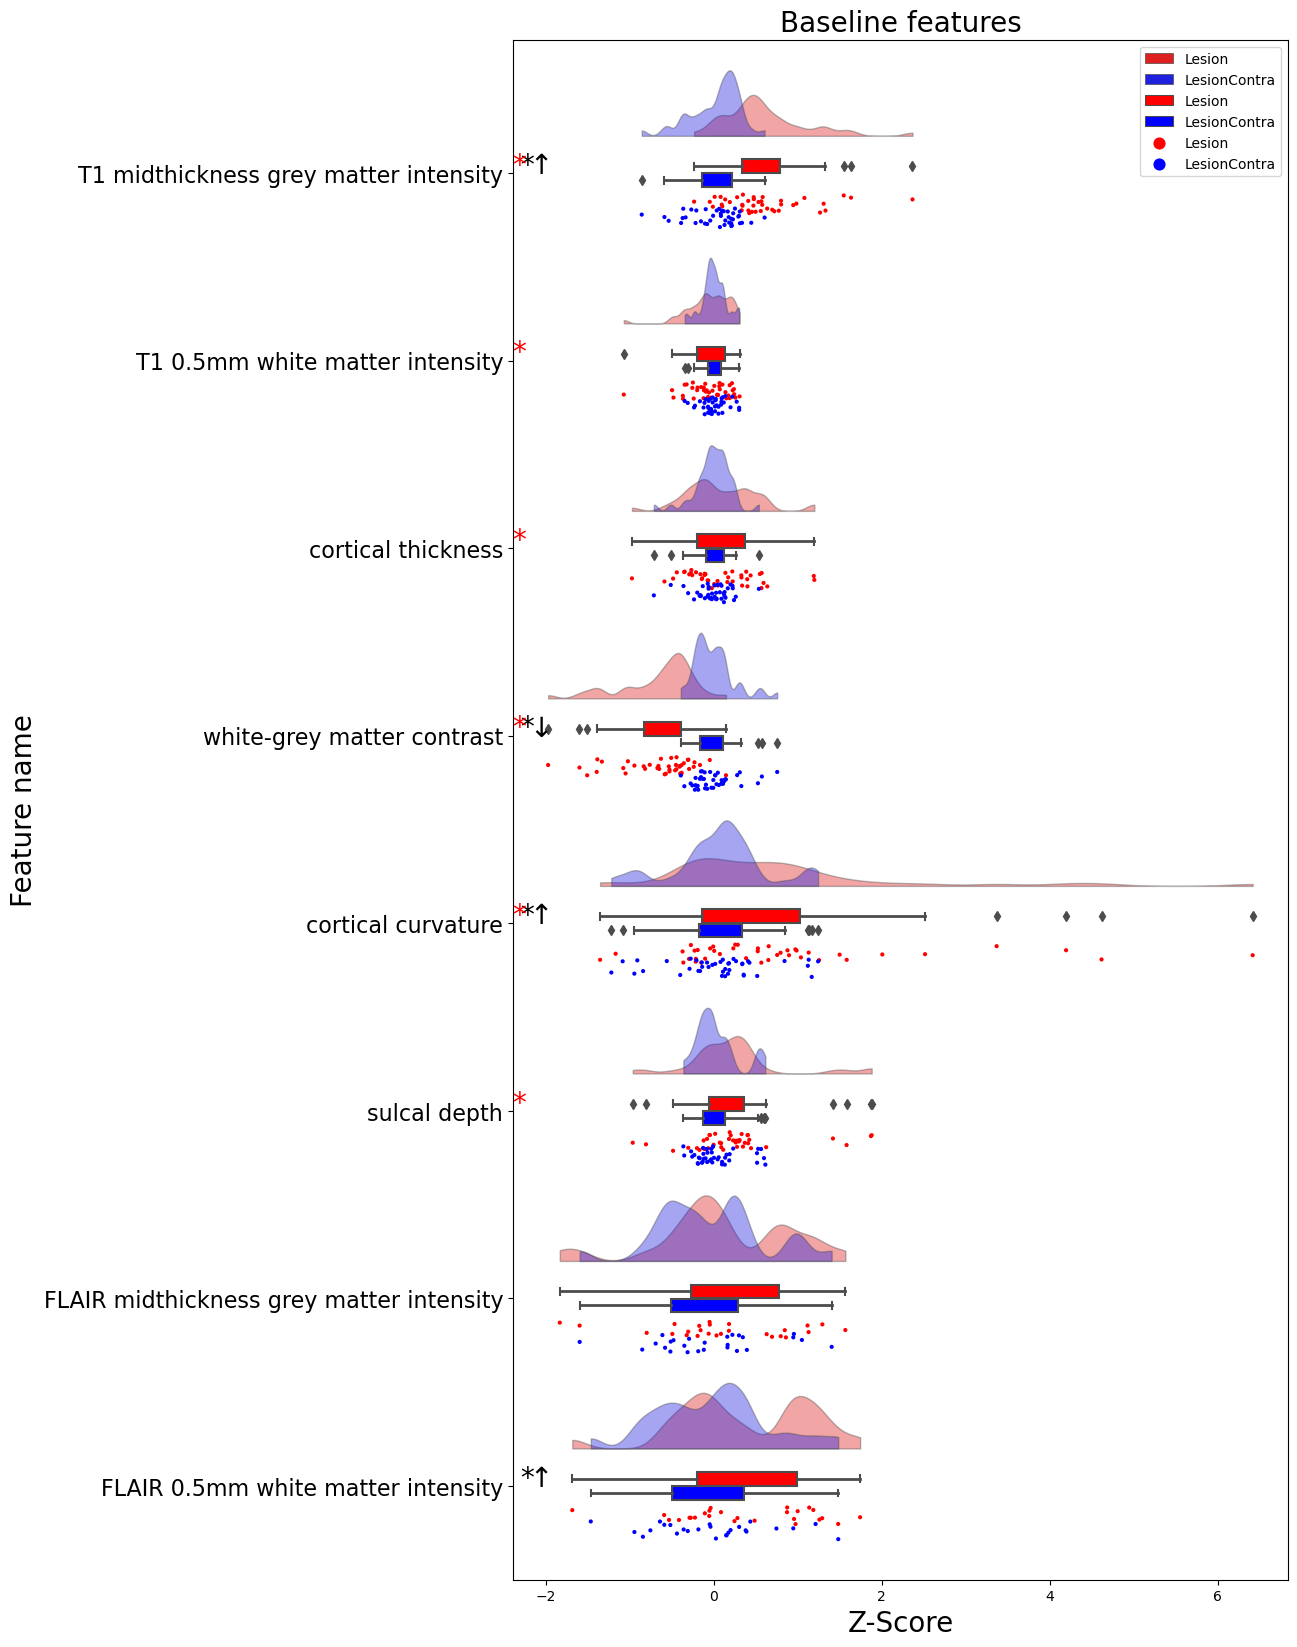

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_rel, levene
import ptitprince as pt  # Make sure this library is installed

# Define the file path
csv_file_path = 'path/baseline_data.csv'

# Load the CSV file
df = pd.read_csv(csv_file_path, sep=",")

# Provided feature names and their alternative names for mapping
alternative_names = {
    'gm_T1_0.5': 'T1 midthickness grey matter intensity',
    'wm_T1_0.5': 'T1 0.5mm white matter intensity',
    'thickness': 'cortical thickness',
    'w-g.pct': 'white-grey matter contrast',
    'pial.k_filtered.sm20': 'cortical curvature',
    'sulc': 'sulcal depth',
    'gm_FLAIR_0.5': 'FLAIR midthickness grey matter intensity',
    'wm_FLAIR_0.5': 'FLAIR 0.5mm white matter intensity'
}

# Initialize a list to store results
results = []

# Iterate over each feature and calculate the paired t-test and Levene's test
for feature in alternative_names.keys():
    feature_in_df = alternative_names[feature]
    lesion_scores = df[(df['Feature'] == feature_in_df) & (df['Lesion_contra'] == 'Lesion')]['Z-score']
    contra_scores = df[(df['Feature'] == feature_in_df) & (df['Lesion_contra'] == 'LesionContra')]['Z-score']

    if len(lesion_scores) > 0 and len(contra_scores) > 0:
        # Calculate paired t-test and Levene's test
        t_stat, p_val_ttest = ttest_rel(lesion_scores, contra_scores)
        stat, p_val_levene = levene(lesion_scores, contra_scores)
        mean_diff = lesion_scores.mean() - contra_scores.mean()
    else:
        p_val_ttest, p_val_levene, mean_diff = np.nan, np.nan, np.nan

    # Append results to the list
    results.append({
        'Feature': feature_in_df,
        'p_value_ttest': p_val_ttest,
        'p_value_levene': p_val_levene,
        'mean_diff': mean_diff
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
output_csv_path = 'path/p_values_results.csv'
results_df.to_csv(output_csv_path, index=False)
print(f"P-values saved to {output_csv_path}")

# Plotting the RainCloud plot
f, ax = plt.subplots(figsize=(10, 20))
pal = {'Lesion': 'red', 'LesionContra': 'blue'}
sigma = 0.2
ort = 'h'

ax = pt.RainCloud(x='Feature', y='Z-score', hue='Lesion_contra', data=df, palette=pal, bw=sigma,
                  width_viol=0.7, ax=ax, orient=ort, dodge=True, move=0.2, alpha=0.4)

# Modify the box plot transparency
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))

ax.legend(loc='upper right')
plt.title("Baseline features", size=20)
ax.tick_params(axis='y', labelsize=16)
ax.set_xlabel('Z-Score', fontsize=20)
ax.set_ylabel('Feature name', fontsize=20)

# Add significance markers to the plot
for f, row in results_df.iterrows():
    if row['p_value_ttest'] < 0.05:
        plt.text(-2.3, f, '*', size=20, color='black')  # Mark for significant paired t-test
        arrow = '↑' if row['mean_diff'] > 0 else '↓'
        plt.text(-2.2, f, arrow, size=20, color='black')
    if row['p_value_levene'] < 0.05:
        plt.text(-2.4, f, '*', size=20, color='red')  # Mark for significant Levene's test

plt.show()


Filtered features in the DataFrame: ['T1 midthickness grey matter intensity' 'T1 0.5mm white matter intensity'
 'white-grey matter contrast' 'sulcal depth'
 'FLAIR midthickness grey matter intensity'
 'FLAIR 0.5mm white matter intensity']
Results saved to /Users/pierceburr/Documents/Documents/UCL_dissertation/meld/output/fastsurfer/inter.intra_z/p_values_results.csv


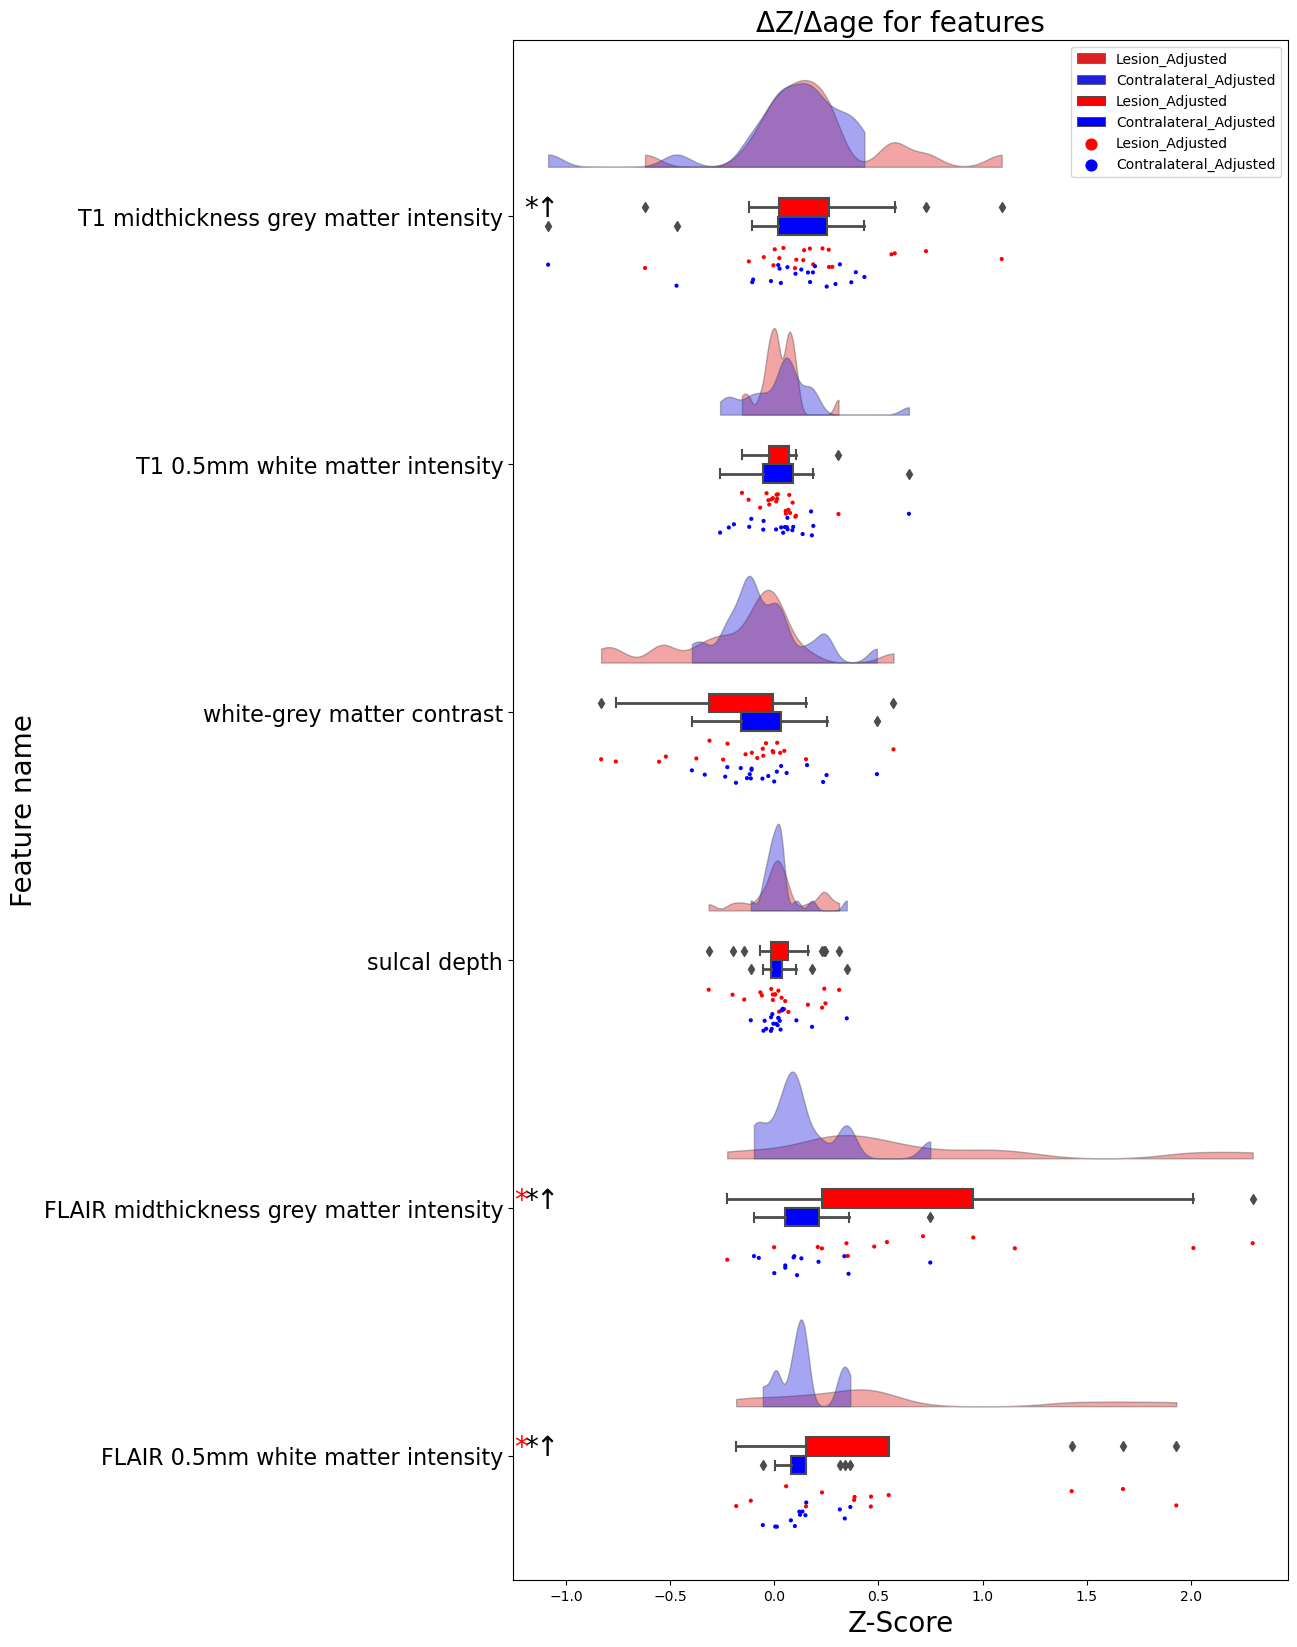

In [44]:
# Load the CSV file
csv_file_path = 'path/reshaped_data.csv'
df = pd.read_csv(csv_file_path, sep=",")

# Provided feature names
feature_names = [
    "T1 midthickness grey matter intensity", "T1 0.5mm white matter intensity", "white-grey matter contrast",
    "sulcal depth", "FLAIR midthickness grey matter intensity", 
    "FLAIR 0.5mm white matter intensity"
]

# Filter the DataFrame to only include rows with the selected features
df_filtered = df[df['Feature'].isin(feature_names)]

# Print the unique features in the filtered DataFrame to confirm
print("Filtered features in the DataFrame:", df_filtered['Feature'].unique())

# Initialize arrays to store p-values and mean differences
p_values_ttest = np.zeros(len(feature_names))
p_values_levene = np.zeros(len(feature_names))
mean_diffs = np.zeros(len(feature_names))

# Iterate over each feature and calculate the paired t-test and Levene's test
for f, feature in enumerate(feature_names):
    lesion_scores = df_filtered[(df_filtered['Feature'] == feature) & (df_filtered['Lesion_contra'] == 'Lesion_Adjusted')]['Z-score']
    contra_scores = df_filtered[(df_filtered['Feature'] == feature) & (df_filtered['Lesion_contra'] == 'Contralateral_Adjusted')]['Z-score']
    
    # Check if there are valid scores to compare
    if len(lesion_scores) > 0 and len(contra_scores) > 0:
        # Paired t-test
        t_stat, p_val_ttest = ttest_rel(lesion_scores, contra_scores)
        p_values_ttest[f] = p_val_ttest
        
        # Calculate mean difference
        mean_diff = lesion_scores.mean() - contra_scores.mean()
        mean_diffs[f] = mean_diff
        
        # Levene's test for equal variances
        stat, p_val_levene = levene(lesion_scores, contra_scores)
        p_values_levene[f] = p_val_levene
    else:
        p_values_ttest[f] = np.nan  # Assign NaN if there are no valid scores
        p_values_levene[f] = np.nan  # Assign NaN if there are no valid scores

# Create a DataFrame to display the p-values and mean differences
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Paired t-test p-value': p_values_ttest,
    'Levene\'s test p-value': p_values_levene,
    'Mean difference': mean_diffs
})

# Save the results table to a CSV file
output_csv_path = 'path/p_values_results_change.csv'
results_df.to_csv(output_csv_path, index=False)
print(f"Results saved to {output_csv_path}")

# Define custom palette
pal = {'Lesion_Adjusted': 'red', 'Contralateral_Adjusted': 'blue'}
sigma = 0.2
ort = 'h'

# Setting alpha level
f, ax = plt.subplots(figsize=(10, 20))

# Plotting using the filtered DataFrame
ax = pt.RainCloud(x='Feature', y='Z-score', hue='Lesion_contra', data=df_filtered, palette=pal, bw=sigma,
                  width_viol=0.7, ax=ax, orient=ort, dodge=True, move=0.2, alpha=0.4)

# Modify the box plot transparency
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))

ax.legend(loc='upper right')
plt.title("ΔZ/Δage for features", size=20)
ax.tick_params(axis='y', labelsize=16)  # Adjust the labelsize as needed
ax.set_xlabel('Z-Score', fontsize=20)  # Adjust the fontsize as needed
ax.set_ylabel('Feature name', fontsize=20)  # Adjust the fontsize as needed

# Add significance markers
for f, (p_val_ttest, p_val_levene, mean_diff) in enumerate(zip(p_values_ttest, p_values_levene, mean_diffs)):
    if p_val_ttest < 0.05:
        plt.text(-1.2, f, '*', size=20, color='black')  # Mark for significant paired t-test
        arrow = '↑' if mean_diff > 0 else '↓'  # Determine arrow direction
        plt.text(-1.15, f, arrow, size=20, color='black')
    if p_val_levene < 0.05:
        plt.text(-1.25, f, '*', size=20, color='red')  # Mark for significant Levene's test

plt.show()
